In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from numba import jit
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
'''Main simulation function'''

def Percolation(L, p=None, NeedPlot=False):
  if p is None:
    #Choose random probability for open site
    p = np.random.random()

  #Generate a square lattice with random obstacles
  lattice = np.random.choice(np.array([0,1]),size=(L,L), p=[p, 1-p])

  #Pour some water over the top
  lattice[0][lattice[0] == 0] = 2

  lattice, percolates = DFS(lattice)

  #Plot the final lattice
  if NeedPlot:
    plt.imshow(lattice, cmap=cmap, interpolation='nearest', vmax=2)
    plt.title(f"The system percolates: {percolates}, p = {round(p, 3)}")
    plt.show()

  return p, percolates

In [ ]:
'''Main loops'''

@jit(nopython=True)
def DFS(lattice):

  for column in range(L):
    #In case of the first row

    #Move south
    if hasPathDfs(lattice, 0, column, 1, column):
      lattice[1][column] = 2

  water_indices = np.column_stack(np.where(lattice == 2))
  percolates = False

  for row in range(L**2):

    for i, j in water_indices:
      #In case of the last row
      if i == L - 1:
        #Move east
        if j + 1 <= L - 1 and hasPathDfs(lattice, i, j, i, j+1) and lattice[i][j + 1] != 2:
          lattice[i][j + 1] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move west
        if j - 1 >= 0 and hasPathDfs(lattice, i, j, i, j-1) and lattice[i][j - 1] != 2:
          lattice[i][j - 1] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move north
        if hasPathDfs(lattice, i, j, i-1, j) and lattice[i - 1][j] != 2:
          lattice[i - 1][j] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

      #In case of internal rows and columns
      elif (i>0 and i<L-1 and j<L-1 and j>0):
        #Move east
        if j + 1 <= L - 1 and hasPathDfs(lattice, i, j, i, j+1) and lattice[i][j + 1] != 2:
          lattice[i][j + 1] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move west
        if j - 1 >= 0 and hasPathDfs(lattice, i, j, i, j-1) and lattice[i][j - 1] != 2:
          lattice[i][j - 1] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move south
        if hasPathDfs(lattice, i, j, i+1, j) and lattice[i + 1][j] != 2:
          lattice[i + 1][j] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move north
        if hasPathDfs(lattice, i, j, i-1, j) and lattice[i - 1][j] != 2:
          lattice[i - 1][j] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

      #In case of the first column
      elif j == 0:
        #Move east
        if j + 1 <= L - 1 and hasPathDfs(lattice, i, j, i, j+1) and lattice[i][j + 1] != 2:
          lattice[i][j + 1] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move south
        if hasPathDfs(lattice, i, j, i+1, j) and lattice[i + 1][j] != 2:
          lattice[i + 1][j] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move north
        if hasPathDfs(lattice, i, j, i-1, j) and lattice[i - 1][j] != 2:
          lattice[i - 1][j] = 2
          water_indices = np.column_stack(np.where(lattice == 2))


      #In case of the last column
      elif j == L - 1:
        #Move west
        if j - 1 >= 0 and hasPathDfs(lattice, i, j, i, j-1) and lattice[i][j - 1] != 2:
          lattice[i][j - 1] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move south
        if hasPathDfs(lattice, i, j, i+1, j) and lattice[i + 1][j] != 2:
          lattice[i + 1][j] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

        #Move north
        if hasPathDfs(lattice, i, j, i-1, j) and lattice[i - 1][j] != 2:
          lattice[i - 1][j] = 2
          water_indices = np.column_stack(np.where(lattice == 2))

      #Check if the system percolates
      if i == L - 1:
        percolates = True
        break
    else:
      continue
    break

  return lattice, percolates

In [ ]:
'''(DFS) Depth First Search algorithm'''
@jit(nopython=True)
def dfs(adj, i, j, visited) :
  m, n = np.shape(adj)

  if i < 0 or j < 0 or i > m-1 or j > n-1 or adj[i][j] == 1 or visited[i][j]:
    return
  visited[i][j] = True
  dfs(adj, i-1, j, visited) # Move left
  dfs(adj, i+1, j, visited) # Move Right
  dfs(adj, i, j-1, visited) # Move top
  dfs(adj, i, j+1, visited) # Move bottom

'''Use DFS to find out whether there is a free path'''
@jit(nopython=True)
def hasPathDfs(adj, sx, sy, dx, dy) :
    m, n = np.shape(adj)
    visited = np.full((m, n), False, dtype=np.bool_)
    dfs(adj, sx, sy, visited)
    if visited[dx][dy] == False:
      return False
    return True

In [ ]:
'''Simulation parameters initialization'''
L = 40
sampleSize = 50
#Choose custom colormap
cmap = colors.ListedColormap(['white', 'dimgray', 'darkturquoise'])

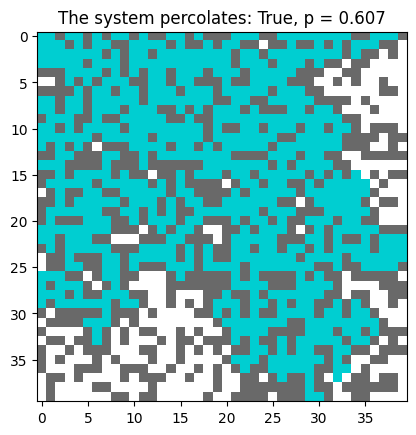

In [ ]:
#Choose random probability for open site
p = np.random.random()

#Generate a square lattice with random obstacles
lattice = np.random.choice(np.array([0,1]),size=(L,L), p=[p, 1-p])

#Pour some water over the top
lattice[0][lattice[0] == 0] = 2

#Plot the final lattice
lattice, percolates = DFS(lattice)
plt.imshow(lattice, cmap=cmap, interpolation='nearest', vmax=2)
plt.title(f"The system percolates: {percolates}, p = {round(p, 3)}")
plt.show()

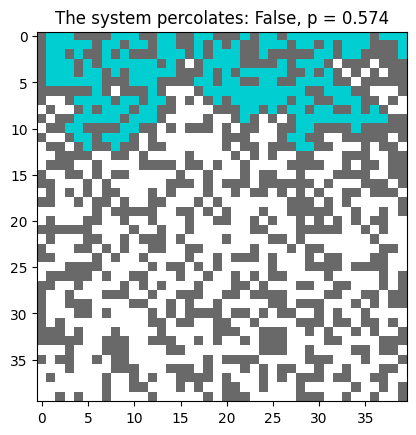

In [ ]:
#Choose random probability for open site
p = np.random.random()

#Generate a square lattice with random obstacles
lattice = np.random.choice(np.array([0,1]),size=(L,L), p=[p, 1-p])

#Pour some water over the top
lattice[0][lattice[0] == 0] = 2

#Plot the final lattice
lattice, percolates = DFS(lattice)
plt.imshow(lattice, cmap=cmap, interpolation='nearest', vmax=2)
plt.title(f"The system percolates: {percolates}, p = {round(p, 3)}")
plt.show()

In [ ]:
'''Take some measurements for different probabilities'''

#Prepare for collecting data for the previously fixed lattice size
P = np.concatenate((np.arange(0.01, 0.575, 0.1), np.arange(0.575, 0.61, 0.004), np.arange(0.61, 0.98, 0.0778)), axis=0)

probs = []

mean_perc = []
std_perc = []


for parameter in P:
  probs += [parameter]
  perc = []
  for iter in range(sampleSize):
    percolates = Percolation(L, p=parameter, NeedPlot=False)[1]
    perc += [percolates]

  perc_mean = np.mean(np.array(perc))
  perc_std = np.std(np.array(perc))

  mean_perc += [perc_mean]
  std_perc += [perc_std]


In [ ]:
data = {
    'p': probs,
    'Percolation_Probability': mean_perc,
    'Percolation_Error': std_perc
}

df = pd.DataFrame(data)
print(df)
df.to_csv(f"/content/gdrive/MyDrive/5SEM/SIM/images/DFS/Percolation_.csv", index=False)

         p  Percolation_Probability  Percolation_Error
0   0.0100                     0.00           0.000000
1   0.1100                     0.00           0.000000
2   0.2100                     0.00           0.000000
3   0.3100                     0.00           0.000000
4   0.4100                     0.00           0.000000
5   0.5100                     0.00           0.000000
6   0.5750                     0.30           0.458258
7   0.5790                     0.20           0.400000
8   0.5830                     0.36           0.480000
9   0.5870                     0.48           0.499600
10  0.5910                     0.48           0.499600
11  0.5950                     0.56           0.496387
12  0.5990                     0.70           0.458258
13  0.6030                     0.62           0.485386
14  0.6070                     0.76           0.427083
15  0.6100                     0.66           0.473709
16  0.6878                     1.00           0.000000
17  0.7656

In [ ]:
#Calculate the critical probability
for index, val in enumerate(probs):
  if mean_perc[index] == 0:
    pmin = probs[index]

  elif mean_perc[index] == 1:
    pmax = probs[index]
    break

pc = pmin + ((pmax - pmin) /2)

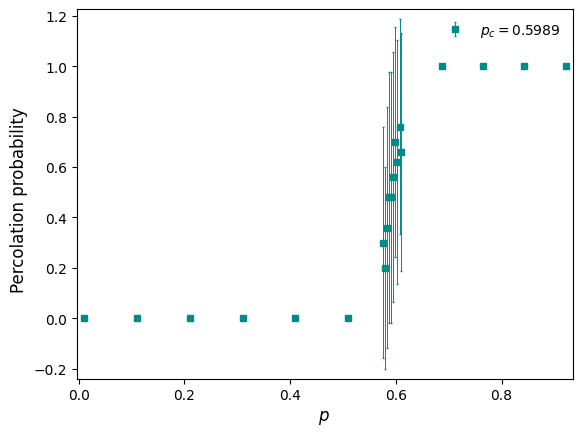

In [ ]:
plt.errorbar(probs, mean_perc, yerr=std_perc,   fmt='s', capsize=1, markersize=5, color = 'darkcyan', elinewidth=0.7, label=fr'$p_c={pc}$')


plt.margins(x=0.015, y=0.029, tight=True)
plt.xlabel(r'$ p $ ', fontsize=12)
plt.ylabel(r'Percolation probability  ', fontsize=12)
plt.legend(frameon=False)
plt.savefig('/content/gdrive/MyDrive/5SEM/SIM/images/DFS/PercolationPlot.png', dpi=1200)
plt.show()

In [ ]:
'''Take measurements for different probabilities and lattice sizes'''

#Prepare for collecting data
P = np.arange(0,0.95,0.005)
lattice_sizes = np.array([40, 60, 80, 100, 120, 130, 180, 200])
lattice_sizes_inverse = [1/l for l in lattice_sizes]
sampleSize = 50
Psmin = []
Psmax = []


for L_size in lattice_sizes:
  probs = []
  mean_perc = []
  std_perc = []
  for parameter in P:
    probs += [parameter]
    perc = []
    for iter in range(sampleSize):
      percolates = Percolation(L_size, p=parameter, NeedPlot=False)[1]
      perc += [percolates]

    perc_mean = np.mean(np.array(perc))
    perc_std = np.std(np.array(perc))

    mean_perc += [perc_mean]
    std_perc += [perc_std]

  #Calculate the critical probability
  for index, val in enumerate(probs):
    if mean_perc[index] == 0:
      pmin = probs[index]

    elif mean_perc[index] == 1:
      pmax = probs[index]
      break

  Psmin += [pmin]
  Psmax += [pmax]

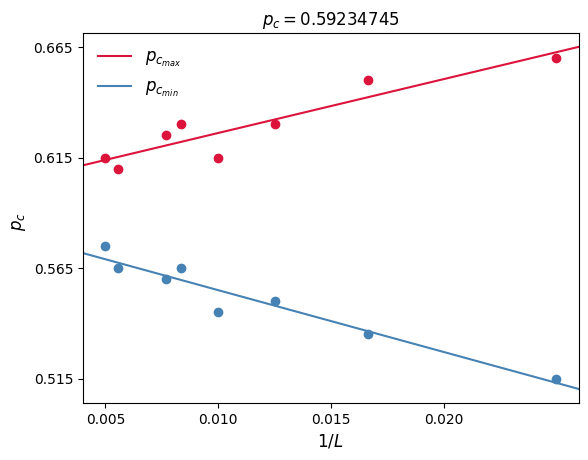

In [ ]:
from scipy.optimize import curve_fit

def linearFunc(x, slope, intercept):
  return slope * x + intercept


popt_min, pcov_min = curve_fit(linearFunc, np.array(lattice_sizes_inverse), Psmin)
popt_max, pcov_max = curve_fit(linearFunc, np.array(lattice_sizes_inverse), Psmax)
b_min = popt_min[1]
b_max = popt_max[1]
b = 0.5*round((b_min + b_max), 7)

plt.scatter(np.array(lattice_sizes_inverse), Psmin, color='steelblue')
plt.scatter(np.array(lattice_sizes_inverse),Psmax, color='crimson')

lattice_sizes_inverse_full = np.linspace(min( lattice_sizes_inverse) - 0.001, max( lattice_sizes_inverse) + 0.001, 1000)


plt.plot(lattice_sizes_inverse_full, linearFunc(lattice_sizes_inverse_full, *popt_max),  color='crimson', linestyle='solid', label=r'$p_{c_{max}}$')
plt.plot(lattice_sizes_inverse_full, linearFunc(lattice_sizes_inverse_full, *popt_min),  color='steelblue', linestyle='solid',  label=r'$p_{c_{min}}$')



plt.yticks(np.arange(min( Psmin)- 0.05, max( Psmax ) + 0.05, 0.05))
plt.xticks(np.arange(min( lattice_sizes_inverse), max( lattice_sizes_inverse ), 0.005))

plt.title(fr'$p_c={b}$')
plt.margins(x=0.0000005, y=0.04, tight=True)
plt.xlabel(r'$ 1/L$ ', fontsize=12)
plt.ylabel(r'$p_c$  ', fontsize=12)
plt.legend(frameon=False, fontsize=12)
plt.savefig('/content/gdrive/MyDrive/5SEM/SIM/images/DFS/CriticalProb.png', dpi=1200)
plt.show()